In [185]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import sys, os
sys.path.insert(0, os.path.abspath("/Users/marcdanielregistre/machine_learning/pytorch"))
from helper_functions import plot_predictions, plot_decision_boundary

In [186]:
data = load_iris()

X = data.data
y = data.target
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X, y
# there are 4 features
# there are 3 outputs

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [4.6000, 3.4000, 1.4000, 0.3000],
         [5.0000, 3.4000, 1.5000, 0.2000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [4.9000, 3.1000, 1.5000, 0.1000],
         [5.4000, 3.7000, 1.5000, 0.2000],
         [4.8000, 3.4000, 1.6000, 0.2000],
         [4.8000, 3.0000, 1.4000, 0.1000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [5.8000, 4.0000, 1.2000, 0.2000],
         [5.7000, 4.4000, 1.5000, 0.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.1000, 3.5000, 1.4000, 0.3000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [5.1000, 3.8000, 1.5000, 0.3000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [5.1000, 3.7000, 1.5000, 0.4000],
         [4.6000, 3.6000, 1.0000, 0.2000],
         [5

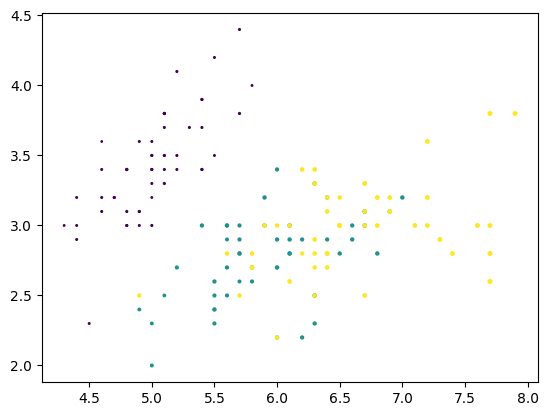

In [187]:
plt.scatter(X[:,0], X[:,1], X[:,2], c=y)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

In [189]:
class LoadIrisModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_layer=120):
        super().__init__()
        self.net = nn.Sequential( 
            nn.Linear(in_features=in_features,
                                out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer,
                                out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer,
                                out_features=out_features)
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)


In [190]:
IN_FEATURES=4
OUT_FEATURES=3
model = LoadIrisModel(IN_FEATURES, OUT_FEATURES)
model.state_dict()

OrderedDict([('net.0.weight',
              tensor([[ 6.1515e-02, -2.8875e-01,  2.0027e-01,  2.7147e-01],
                      [ 2.5152e-01,  4.7916e-01, -3.5664e-01,  4.3217e-01],
                      [ 3.4136e-01,  1.2197e-01,  1.9787e-01,  1.1013e-01],
                      [-1.8878e-01,  3.1259e-01, -4.2830e-01, -2.6573e-01],
                      [-2.7200e-01,  1.3110e-01, -1.2948e-01,  3.7606e-01],
                      [ 2.4324e-01, -4.5448e-01,  3.8005e-01, -3.5397e-02],
                      [-4.7740e-01,  3.7409e-01, -4.9636e-01,  3.9792e-02],
                      [-3.7857e-01, -2.3035e-01,  2.1479e-01,  2.6870e-01],
                      [ 4.9039e-01,  2.1452e-01, -2.8277e-01,  2.9723e-01],
                      [-6.8279e-02, -2.4183e-01,  7.5597e-02,  3.3850e-01],
                      [ 3.5066e-01,  9.4524e-02, -4.0978e-01,  6.8996e-02],
                      [-3.9059e-01,  3.6654e-01, -4.2277e-01,  3.7756e-01],
                      [ 4.2882e-01,  1.3362e-02,  2.6815e-

In [191]:
loss_fn = nn.CrossEntropyLoss() # for multiple class with softmax output already in there. return logits
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [192]:
def acc(y_pred, y_value):
    true_value = torch.eq(y_pred, y_value).sum().item()
    return 100*true_value/len(y_value)

Epoch: 0, train loss: 1.053393006324768, train acc: 43.333333333333336%, test loss: 1.0499745607376099, test acc: 50.0%
Epoch: 1000, train loss: 0.4503644108772278, train acc: 94.16666666666667%, test loss: 0.44896405935287476, test acc: 93.33333333333333%
Epoch: 2000, train loss: 0.30108243227005005, train acc: 96.66666666666667%, test loss: 0.3095889091491699, test acc: 96.66666666666667%
Epoch: 3000, train loss: 0.2144608348608017, train acc: 97.5%, test loss: 0.2316894382238388, test acc: 100.0%
Epoch: 4000, train loss: 0.16347093880176544, train acc: 97.5%, test loss: 0.18626514077186584, test acc: 100.0%
Epoch: 5000, train loss: 0.1339947134256363, train acc: 97.5%, test loss: 0.15944524109363556, test acc: 100.0%
Epoch: 6000, train loss: 0.11617174744606018, train acc: 98.33333333333333%, test loss: 0.1427076756954193, test acc: 100.0%
Epoch: 7000, train loss: 0.10464620590209961, train acc: 98.33333333333333%, test loss: 0.13152216374874115, test acc: 100.0%
Epoch: 8000, train 

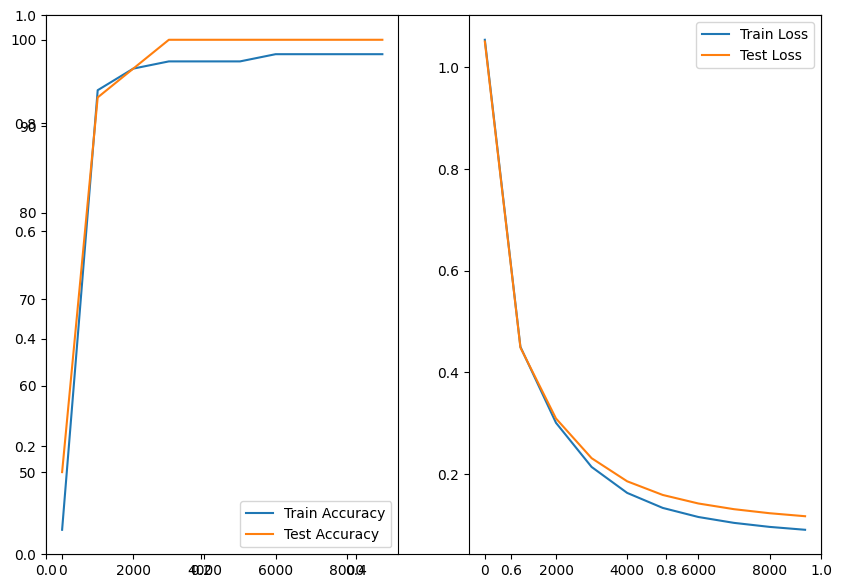

In [193]:
epochs = 10000

epoch_count=[]
training_loss=[]
testing_loss=[]
training_acc=[]
testing_acc=[]

for epoch in range(epochs):
    model.train()

    # forwared pass
    logits = model(X_train.squeeze())
    # calculate loss
    loss = loss_fn(logits, y_train.type(torch.LongTensor))
    y_pred = logits.argmax(dim=1) # since output of CrossEntropy is softmax, we can do this

 
    # zero grad optiizer
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # step to update weights and bias
    optimizer.step()

    # TEstin
    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test)
        test_loss = loss_fn(test_logits, y_test.type(torch.LongTensor))

        test_y_pred = test_logits.argmax(dim=1)

        if epoch %1000 ==0:
            epoch_count.append(epoch)
            training_loss.append(loss.numpy())
            testing_loss.append(test_loss.numpy())

            train_acc = acc(y_pred, y_train)
            test_acc = acc(test_y_pred, y_test)

            training_acc.append(train_acc)
            testing_acc.append(test_acc)
            print(f"Epoch: {epoch}, train loss: {loss}, train acc: {train_acc}%, test loss: {test_loss}, test acc: {test_acc}%")


plt.subplots(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(epoch_count, training_acc, label='Train Accuracy')
plt.plot(epoch_count, testing_acc, label='Test Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_count, training_loss, label='Train Loss')
plt.plot(epoch_count, testing_loss, label='Test Loss')
plt.legend()
plt.show()